## Agregación de datos por categoría

In [2]:
import numpy as np
import pandas as pd

### Creación de un dataset aleatorio a partir de elementos de una lista elegidos al azar con np.random.choice()
Creamos dos listas, una con dos géneros y otra con tres tipos de ingresos. Para rellenarlas escogemos un número de 500 muestras

In [2]:
gender = ["male", "female"]
income = ["poor", "middle class", "rich"]
n = 500

Para poblar aleatoriamente las listas recorremos un rango de 0 a el número de muestras y vamos añadiendo con append un dato aleatorio de cada lista usando np.random.choice()

In [3]:

gender_data = []
income_data = []

for i in range(0,n):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))
#gender_data

In [4]:
#usamos normal 
height = 170 + 15 *np.random.randn(n)
weight = abs(65 +15 *np.random.randn(n))
age = 40 + 10*np.random.randn(n)
income = 18000 +3500*np.random.randn(n)


In [5]:
data =pd.DataFrame(
    {
        "Gender":gender_data,
        "Ec_Status":income_data,
        "Height":height,
        "Weight":weight,
        "Age":pd.to_numeric(age, downcast='integer'),
        "Income":income
    }
)
data["Age"] = data["Age"].astype(int)
data["Income"] = data["Income"].astype(int)

In [6]:
data.describe()

,Height,Weight,Age,Income
count,500.000000,500.000000,500.000000,500.000000
mean,169.295010,65.116800,40.074000,17768.798000
std,15.053938,15.072709,10.260364,3602.446164
min,117.741097,15.198827,6.000000,6963.000000
25%,159.482758,55.299549,33.000000,15512.500000
50%,168.246504,65.451305,41.000000,17744.000000
75%,179.504640,75.396664,47.000000,20027.500000
max,209.140185,103.446330,73.000000,28003.000000


### Agrupación de datos

In [7]:
grp_gender = data.groupby("Gender")

In [8]:
grp_gender.groups

{'female': Int64Index([  0,   1,   2,   3,   4,   6,   7,   8,   9,  12,
             ...
             472, 473, 474, 475, 476, 480, 486, 487, 494, 498],
            dtype='int64', length=236),
 'male': Int64Index([  5,  10,  11,  14,  15,  16,  18,  19,  20,  21,
             ...
             488, 489, 490, 491, 492, 493, 495, 496, 497, 499],
            dtype='int64', length=264)}

In [9]:
for names, groups in grp_gender:
    print (names)
    print (groups)

female
     Gender     Ec_Status      Height     Weight  Age  Income
0    female          poor  175.830678  81.028405   33   17750
1    female          rich  187.079055  83.593332   22   22717
2    female  middle class  151.464115  71.983953   39   22323
3    female          poor  166.686177  67.877114   43   13778
4    female  middle class  152.387189  68.196006   44   21395
..      ...           ...         ...        ...  ...     ...
480  female          rich  166.892023  41.197977   35   21112
486  female          rich  132.306739  97.355221   53   17999
487  female          poor  157.825763  47.439872   47   14420
494  female          poor  165.956587  62.141667   50   24726
498  female          rich  169.651957  58.869617   33    6963

[236 rows x 6 columns]
male
    Gender     Ec_Status      Height     Weight  Age  Income
5     male  middle class  161.692555  80.703461   44   17347
10    male  middle class  149.012008  61.018697   57   18710
11    male          rich  137.159266 

In [10]:
grp_gender.get_group("female")

,Gender,Ec_Status,Height,Weight,Age,Income
0,female,poor,175.830678,81.028405,33,17750
1,female,rich,187.079055,83.593332,22,22717
2,female,middle class,151.464115,71.983953,39,22323
3,female,poor,166.686177,67.877114,43,13778
4,female,middle class,152.387189,68.196006,44,21395
...,...,...,...,...,...,...
480,female,rich,166.892023,41.197977,35,21112
486,female,rich,132.306739,97.355221,53,17999
487,female,poor,157.825763,47.439872,47,14420
494,female,poor,165.956587,62.141667,50,24726


In [11]:
grp_GenderStatus = data.groupby(["Gender", "Ec_Status"])

grp_GenderStatus.sum()

Height       Weight   Age   Income
Gender Ec_Status                                             
female middle class  10702.724919  4246.846580  2589  1156554
       poor          15750.542897  6114.807045  3714  1640281
       rich          13259.523946  5148.194200  3359  1360862
male   middle class  14533.697277  5700.908962  3422  1496362
       poor          13948.306173  5384.234098  3228  1439743
       rich          16452.709793  5963.408957  3725  1790597

In [12]:
grp_GenderStatus.describe()

Height                                                 \
                     count        mean        std         min         25%   
Gender Ec_Status                                                            
female middle class   64.0  167.230077  14.566099  117.741097  160.004410   
       poor           93.0  169.360676  13.631785  140.766948  160.000362   
       rich           79.0  167.842075  15.966136  132.306739  156.556542   
male   middle class   86.0  168.996480  14.412513  140.534674  157.970250   
       poor           82.0  170.101295  15.462233  135.746009  160.124777   
       rich           96.0  171.382394  16.155981  135.080111  159.125017   

                                                        Weight             \
                            50%         75%         max  count       mean   
Gender Ec_Status                                                            
female middle class  165.837734  176.193919  209.140185   64.0  66.356978   
       poor          168.137729  177.467845  206.213664   93.0  65.750613   
       rich          167.791220  178.374167  207.527949   79.0  65.167015   
male   middle class  168.082356  179.202251  202.978692   86.0  66.289639   
       poor          168.171999  183.690461  206.886532   82.0  65.661391   
       rich          172.738269  181.245836  207.362681   96.0  62.118843   

                     ...    Age       Income                             \
                     ...    75%   max  count          mean          std   
Gender Ec_Status     ...                                                  
female middle class  ...  47.25  68.0   64.0  18071.156250  3118.131025   
       poor          ...  47.00  59.0   93.0  17637.430108  3636.464846   
       rich          ...  50.00  73.0   79.0  17226.101266  4014.388198   
male   middle class  ...  45.00  58.0   86.0  17399.558140  3380.532651   
       poor          ...  44.75  65.0   82.0  17557.841463  3973.917793   
       rich          ...  45.25  63.0   96.0  18652.052083  3273.793050   

                                                                    
                         min       25%      50%       75%      max  
Gender Ec_Status                                                    
female middle class  11163.0  15940.00  18217.5  20334.00  25177.0  
       poor           7879.0  15382.00  17822.0  19904.00  27087.0  
       rich           6963.0  14865.00  17156.0  19622.00  28003.0  
male   middle class   9264.0  15229.75  17888.5  19581.25  25362.0  
       poor           8350.0  15258.50  17203.5  19832.00  25953.0  
       rich          11619.0  16290.75  18396.0  21065.00  25931.0  

[6 rows x 32 columns]

In [13]:
grp_GenderStatus["Income"].describe()

count          mean          std      min       25%  \
Gender Ec_Status                                                           
female middle class   64.0  18071.156250  3118.131025  11163.0  15940.00   
       poor           93.0  17637.430108  3636.464846   7879.0  15382.00   
       rich           79.0  17226.101266  4014.388198   6963.0  14865.00   
male   middle class   86.0  17399.558140  3380.532651   9264.0  15229.75   
       poor           82.0  17557.841463  3973.917793   8350.0  15258.50   
       rich           96.0  18652.052083  3273.793050  11619.0  16290.75   

                         50%       75%      max  
Gender Ec_Status                                 
female middle class  18217.5  20334.00  25177.0  
       poor          17822.0  19904.00  27087.0  
       rich          17156.0  19622.00  28003.0  
male   middle class  17888.5  19581.25  25362.0  
       poor          17203.5  19832.00  25953.0  
       rich          18396.0  21065.00  25931.0

In [15]:
grp_GenderStatus.aggregate(
    {
        "Weight" : np.mean,
        "Age" : lambda age:(np.mean(age))/np.std(age),
        "Height" : np.std
    }
)

Weight       Age     Height
Gender Ec_Status                                   
female middle class  66.356978  3.757026  14.566099
       poor          65.750613  3.939360  13.631785
       rich          65.167015  3.956493  15.966136
male   middle class  66.289639  4.278543  14.412513
       poor          65.661391  3.739108  15.462233
       rich          62.118843  3.959955  16.155981

In [16]:
grp_GenderStatus.sum()

Height       Weight   Age   Income
Gender Ec_Status                                             
female middle class  10702.724919  4246.846580  2589  1156554
       poor          15750.542897  6114.807045  3714  1640281
       rich          13259.523946  5148.194200  3359  1360862
male   middle class  14533.697277  5700.908962  3422  1496362
       poor          13948.306173  5384.234098  3228  1439743
       rich          16452.709793  5963.408957  3725  1790597

## Filtrado de datos

In [28]:
grp_GenderStatus.std()

Height     Weight        Age       Income
Gender Ec_Status                                                 
female middle class  14.566099  16.684825  10.852444  3118.131025
       poor          13.631785  15.907261  10.192502  3636.464846
       rich          15.966136  13.438766  10.815303  4014.388198
male   middle class  14.412513  14.668742   9.354604  3380.532651
       poor          15.462233  13.770077  10.592931  3973.917793
       rich          16.155981  15.785223   9.850055  3273.793050

In [30]:
grp_GenderStatus["Age"].filter(lambda edad: edad.std()>=10.20)

1      22
2      39
4      44
7      42
8      45
       ..
480    35
483    53
486    53
491    25
498    33
Name: Age, Length: 225, dtype: int64

## Transformación de variables
Vamos a normalizar una distribución, para ello se le resta la media a cada valor dividido por la desviación típica

In [34]:
zscore = lambda x : (x-x.mean())/x.std()

In [42]:
z_group = grp_GenderStatus.transform(zscore)
z_group

,Height,Weight,Age,Income
0,0.474626,0.960429,-0.680450,0.030956
1,1.204861,1.371132,-1.897218,1.367805
2,-1.082374,0.337251,-0.133898,1.363587
3,-0.196196,0.133681,0.300664,-1.061314
4,-1.019002,0.110222,0.326827,1.065973
...,...,...,...,...
495,0.273594,-0.344995,0.832271,-0.327159
496,0.068542,1.981385,0.933793,1.126812
497,-0.077907,-0.060414,0.984467,2.214575
498,0.113358,-0.468599,-0.880141,-2.556579


Si nos decidimos a pintarla, debemos ver una normal 0,1 clásica:

In [15]:
import matplotlib.pyplot as pyplt

(array([  1.,   4.,  14.,  49.,  82., 112., 116.,  87.,  26.,   9.]),
 array([-3.66465379, -3.0361249 , -2.40759602, -1.77906714, -1.15053826,
        -0.52200938,  0.1065195 ,  0.73504838,  1.36357726,  1.99210614,
         2.62063502]),
 <a list of 10 Patch objects>)

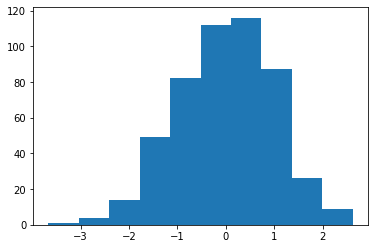

In [51]:
pyplt.hist(z_group["Weight"])

# Conjunto de entrenamiento y conjunto de testing

Para realizar modelos predictivos/entrenar redes neuronales, etc. es necesario dividir elconjuinto de datos de entrada en conjunto de entrenamiento y conjunto de test (Y opcionalmente un tercero de validación). 

Para ello no nos queda otra que dividir los dataset de manera aleatoria, para que no aparezcan comportamientos aberrantes debido al sesgo

En vez de utilizar la librería que ya no existe:
````from sklearn.cross_validation import train_test_split````
ahora se debe utilizar:
````from sklearn.model_selection import train_test_split ````

Para ello vamos a cargar uno de los data sets que teníamos para hacer pruebas que era el customer churn model que tenía tres mil y pico de columnas y vamos a utilizar tres métodos diferentes para dividir el dataseten conjunto de entrenamiento (75% de los datos) y conjunto de testing (25% de los datos



In [7]:
data = pd.read_csv("../../datasets/customer-churn-model/Customer Churn Model.txt")

In [10]:
len(data)

3333

## Dividir los datos utilizando la distribución normal
Cogiendo una distribución normal tengo valores entre -4 y 4 aprox distribuidos normalmente con media 0 y varianza 1. De estos valores puedo creaar, por ejemplo una seria de true/false segun los valores sean menores que 0.8 al ser la normal equivale al 80% de los valores)

(array([  1.,  10.,  63., 302., 676., 995., 796., 385.,  87.,  18.]),
 array([-4.22186171, -3.47664953, -2.73143734, -1.98622516, -1.24101298,
        -0.49580079,  0.24941139,  0.99462358,  1.73983576,  2.48504794,
         3.23026013]),
 <a list of 10 Patch objects>)

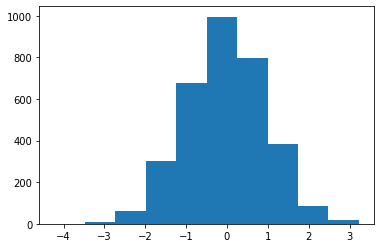

In [36]:
a = np.random.randn(len(data))
pyplt.hist(a)

In [37]:
check = (a<0.8)
check

array([ True,  True,  True, ...,  True,  True,  True])

(array([ 644.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2689.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

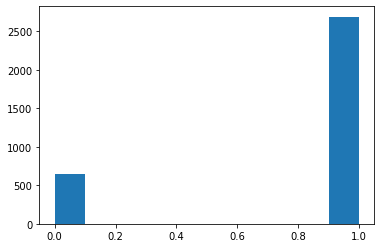

In [40]:
pyplt.hist(check.astype(int) )

In [43]:
training = data[check]
testing = data[~check]
print(len(training))
print(len(testing))

2689
644


## Con la librería sklearn
es una librería estadistica para estos casos. Ahorramos 4 líneas

In [49]:
# from sklearn.cross_decomposition import train_test_split OOOLDER
from sklearn.model_selection import train_test_split

In [51]:
train, test = train_test_split(data, test_size = 0.2)
print(len(train))
print(len(test))

2666
667
